# Información 

1. Descricpción del problema
1. Data cleaning y formatting
1. EDA
3. Feature selecction y engenieering
4. Comparación de modelos
5. Hyperparameter tunning sobre el mejor modelo
6. Evaluacion
7. Interpretación
8. Conclusión

OBJETIVO: Determinar que personas van a ser morosos en los prestamos

# 0. IMPORTACIONES Y SETEOS

## Imports 

In [4]:
# Pandas y numpy para manipulación
import pandas as pd
import numpy as np
# Librerias para gráficos 
import seaborn as sns
import matplotlib.pyplot as plt
# Herramientas de modelado
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
# from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor


# Funciones de DS
import DSImplementation as dsimp
# Funciones para analizar valores faltantes 
import missingno as msno

## Seteos

In [5]:
# Para evitar que salgan advertencias por usar dataframes sin un .copy()
pd.options.mode.chained_assignment = None

# Se setea un maximo de 60 columnas para visualizar
pd.set_option('display.max_columns', 60)

# Matplotlib visualización en la celda
%matplotlib inline

# 1. DESCRIPCIÓN DEL PROBLEMA 

# 2. DATA CLEANING Y FORMATING

## Carga del dataset a trabajar 

In [6]:
# Se carga el dataset
data_train = pd.read_csv("Data/DATASET TP4 VERSION 2.csv")

In [7]:
data_train.head(5)

,Fecha_Pago,Vencimiento,Tipo_Prestamo,Numero_Prestamo,Total_Prestamo,Total_cuotas,Numero_Cuota,Pago,Genero,Edad,Paga_en_Termino,Refinanciado
0,2020-01-02 00:00:00.000,2020-01-20 00:00:00.000,1,11004094,30000.00,36.0,16,842.81,NaN,NaN,1,0
1,2020-01-02 00:00:00.000,2020-02-20 00:00:00.000,1,11004094,30000.00,36.0,17,2.10,NaN,NaN,1,0
2,2020-01-02 00:00:00.000,2020-02-20 00:00:00.000,50,10991941,71113.43,240.0,221,286.26,M,122.0,1,0
3,2020-01-02 00:00:00.000,2020-04-20 00:00:00.000,50,10991941,71113.43,240.0,223,286.26,M,122.0,1,0
4,2020-01-02 00:00:00.000,2020-03-20 00:00:00.000,50,10991941,71113.43,240.0,222,286.26,M,122.0,1,0


## Tipo de datos, valores faltantes y valores nulos 

### Valores nulos y tipo de datos 

In [15]:
# Cantidad de datos totales
data_train.shape

(203851, 12)

In [17]:
# Se observa los tipos de columna
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203851 entries, 0 to 203850
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Fecha_Pago       203851 non-null  object 
 1   Vencimiento      188187 non-null  object 
 2   Tipo_Prestamo    203851 non-null  int64  
 3   Numero_Prestamo  203851 non-null  int64  
 4   Total_Prestamo   192554 non-null  float64
 5   Total_cuotas     192554 non-null  float64
 6   Numero_Cuota     203851 non-null  int64  
 7   Pago             203851 non-null  float64
 8   Genero           60101 non-null   object 
 9   Edad             60101 non-null   float64
 10  Paga_en_Termino  203851 non-null  int64  
 11  Refinanciado     203851 non-null  int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 18.7+ MB


NoneType

In [20]:
data_train.select_dtypes(include="object").columns

Index(['Fecha_Pago', 'Vencimiento', 'Genero'], dtype='object')

Observamos que las columnas  "Fecha de pago", "Vencimiento" y "Genero" son de tipo objetvo. Vamos a transformarlos. Tambien observamos que Edad se encuentra como un float

In [ ]:
data_train[""]

 ### Parseo de datos

 ### Valores faltantes 

No se encontraron valores faltantes

In [9]:
dsimp.missing_values_table(data_train)

Your selected dataframe has 12 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
Genero,143750,70.5
Edad,143750,70.5
Vencimiento,15664,7.7
Total_Prestamo,11297,5.5
Total_cuotas,11297,5.5


<AxesSubplot:>

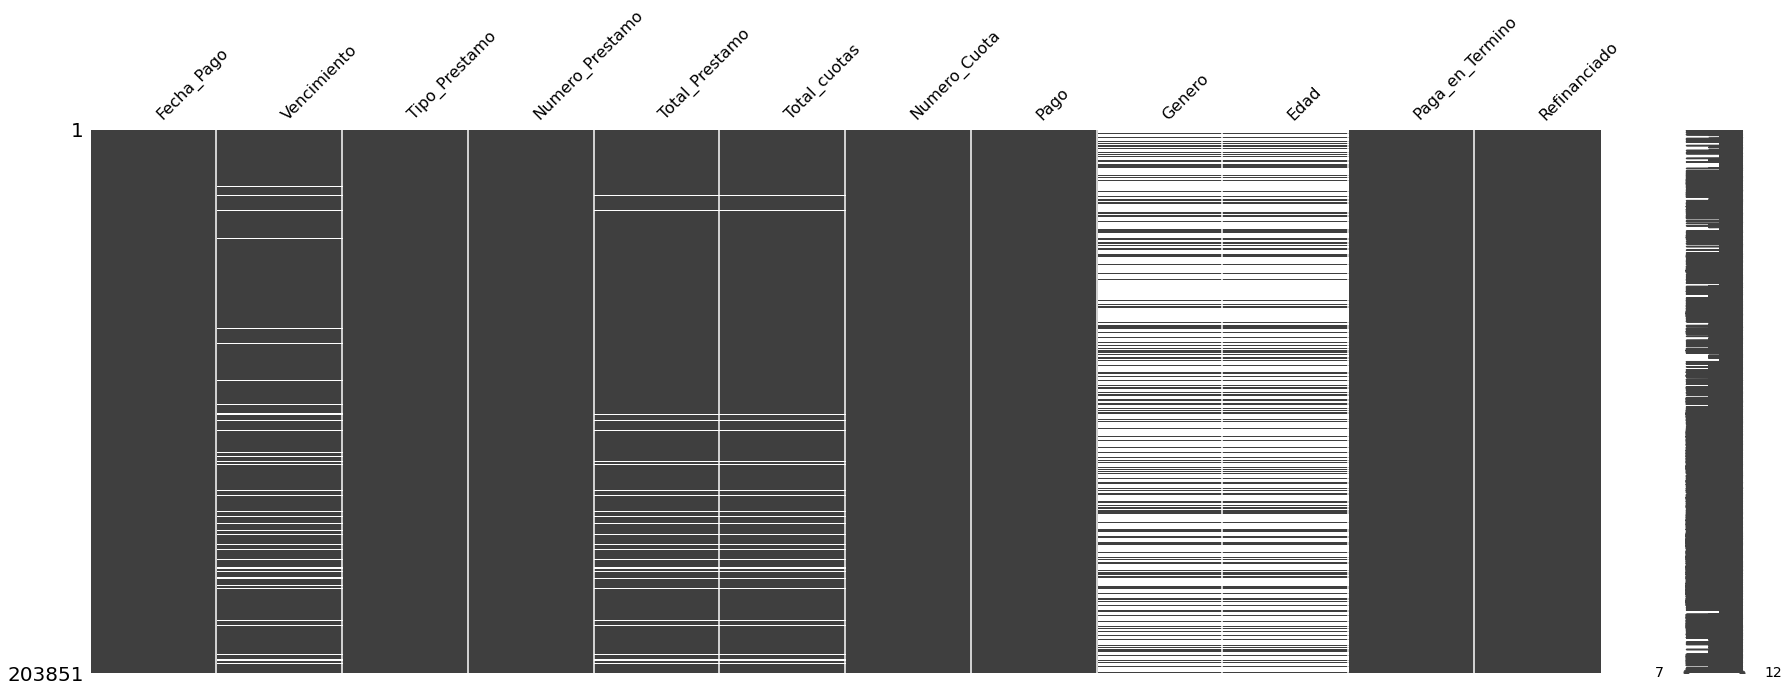

In [14]:
msno.matrix(data_train, figsize=(30,10))

# 3. EDA

### Estadisticas basicas

In [66]:
data_train.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Analisis variable objetivo

Primero se inicia analizando la variable target para analizar si se encuentra balanceado el data set. Observamos que sigue una distribución uniforme, con lo cual no vamos a necesitar recurrir a SMOTE para balancearlo. Concluimos que:

* El dataset se encuentra balanceado
* No se observa presencia de anomalias o outliers

Text(0.5, 1.0, 'Balance de la variable objetivo "Price range"')

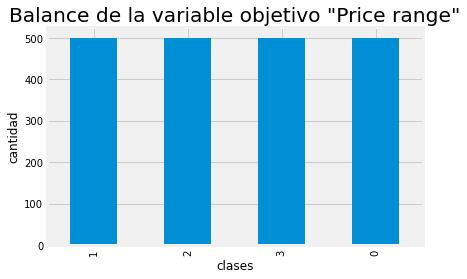

In [67]:
# Grafico
data_train.price_range.value_counts().plot(kind='bar')
# Seteos del gráfico
plt.style.use('fivethirtyeight')
plt.xlabel('clases')
plt.ylabel ('cantidad')
plt.title('Balance de la variable objetivo "Price range"')

### Análisis de variables descriptivas  

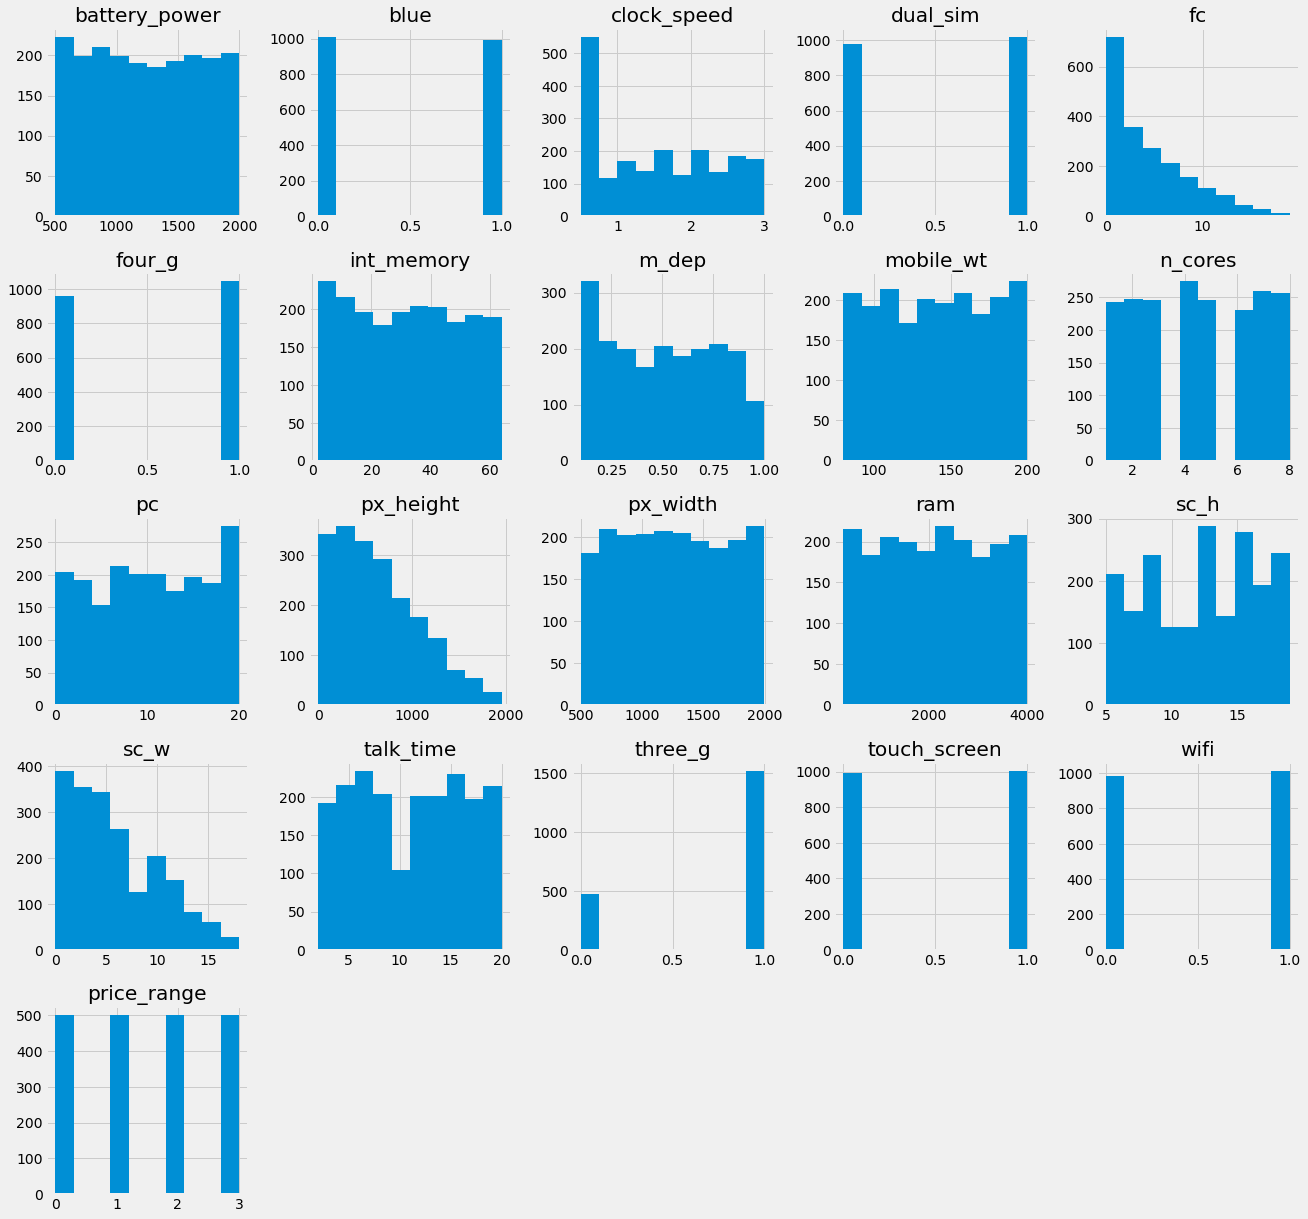

In [16]:
data_train.hist(figsize=(20,20))
plt.show()

### Analisis con la variable objetivo

* Destaca la relacion que tiene la variable objetivo con la ram
* el fc con el pc
* trhee g con four g

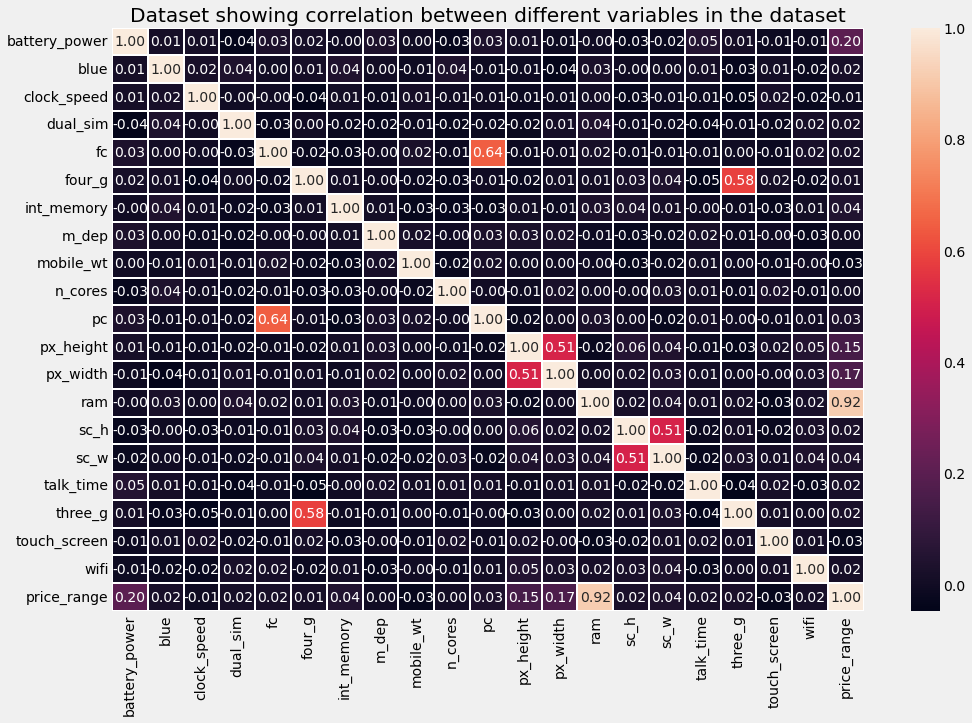

In [17]:
corr = data_train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=.2,)
plt.title('Dataset showing correlation between different variables in the dataset')
plt.show()

In [18]:
price_range_corr =  corr.price_range.sort_values(ascending = False)
price_range_corr_top = price_range_corr.head(6)
price_range_corr_bottom = price_range_corr.tail()
print ('top corr: \n{} \n\nbottom corr: \n{}'.format(price_range_corr_top, price_range_corr_bottom))

top corr: 
price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
Name: price_range, dtype: float64 

bottom corr: 
n_cores         0.004399
m_dep           0.000853
clock_speed    -0.006606
mobile_wt      -0.030302
touch_screen   -0.030411
Name: price_range, dtype: float64


In [ ]:
sns.pairplot(data_train, hue='price_range')

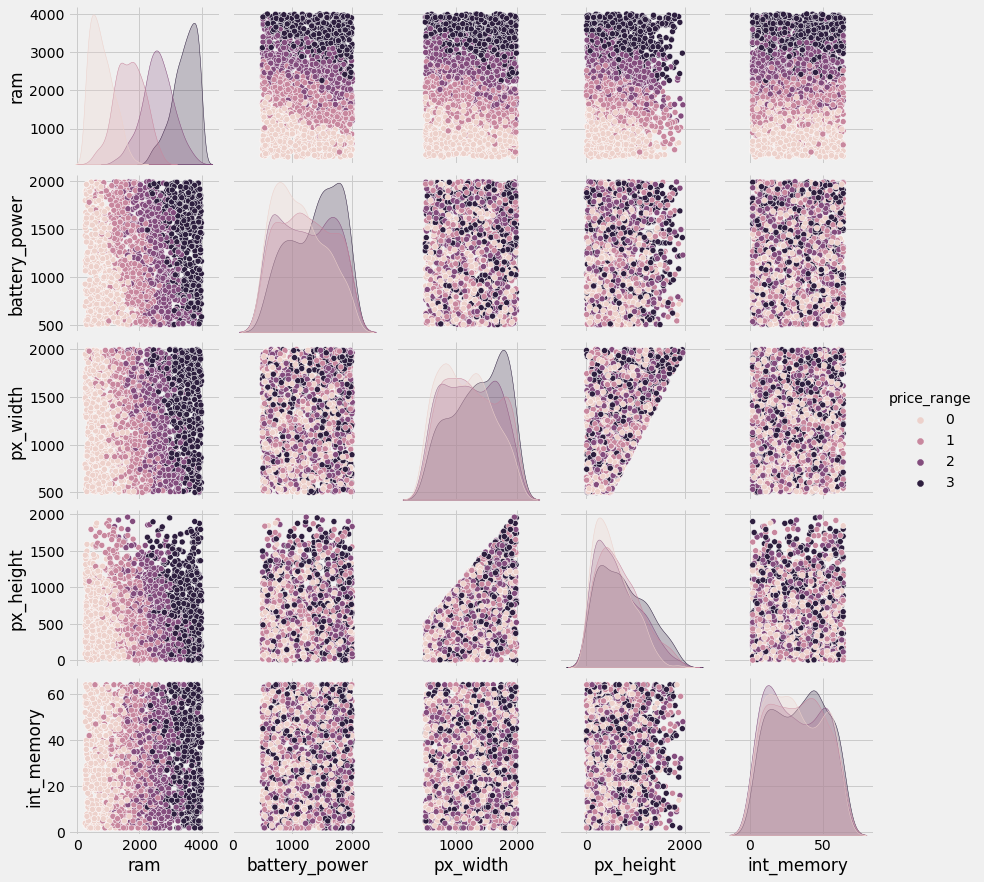

In [79]:
sns.pairplot(data_train[price_range_corr_top.index], hue='price_range')

<Figure size 1080x1080 with 0 Axes>

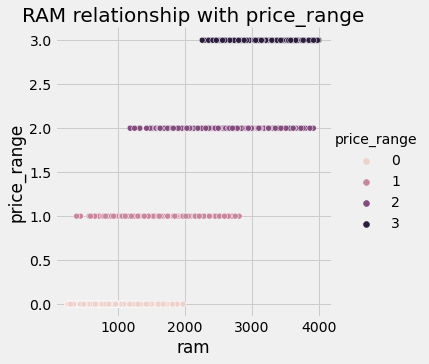

<Figure size 1080x1080 with 0 Axes>

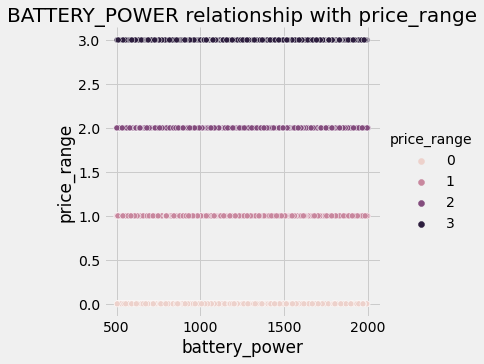

<Figure size 1080x1080 with 0 Axes>

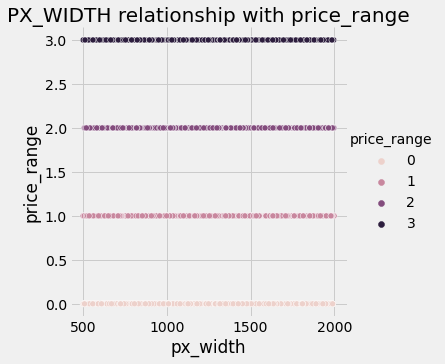

<Figure size 1080x1080 with 0 Axes>

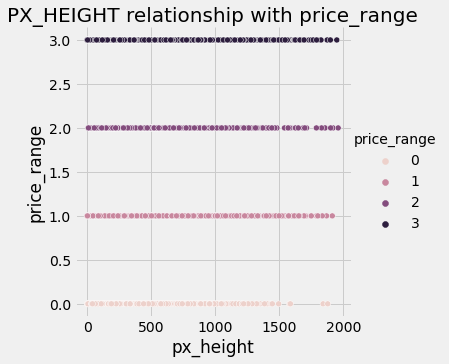

<Figure size 1080x1080 with 0 Axes>

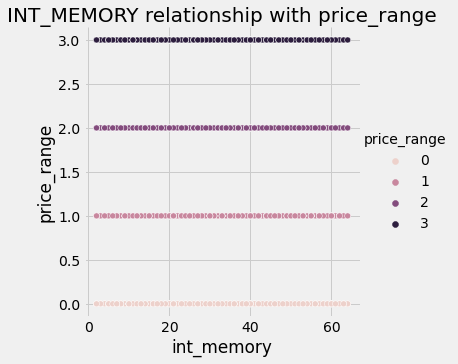

In [19]:
for x in price_range_corr_top[1:].index:
    dsimp.relation_diagram(x, 'price_range', data_train)

# 4. Feature selecction y engenieering


In [88]:
# Se separ entre variables destino y explicativas
X = data_train.drop('price_range', axis = 1)
y = data_train['price_range']

In [21]:
# Se divide el data set para el entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 1)

## Regresión Lineal 

In [22]:
# Se instancia el modelo
lr = LinearRegression()
# Se fitea el modelo
lr.fit(X_train, y_train)
# Se evalua el modelo
lr_Range = lr.predict(X_test)
lr_Score = lr.score(X_test, y_test)
lr_Mae = mean_absolute_error(y_test, lr_Range)
print('score RL: ', lr_Score)
print('promedio de error absoluto RL', lr_Mae)

score RL:  0.9077139501473082
promedio de error absoluto RL 0.28492595697333567


### Decision Tree Regression

In [23]:
# Se instancia el modelo
dt = DecisionTreeRegressor(max_leaf_nodes=200, random_state = 1)
# Se fitea el modelo
dt.fit(X_train, y_train)
# Prediccion
dt_range = dt.predict(X_test)
# Evaluación del modelo
dt_score = dt.score(X_test, y_test)
dt_Mae = mean_absolute_error(y_test, dt_range)
print('score DT: ', dt_score)
print('promedio de error absoluto DT', dt_Mae)

score DT:  0.8604114826728166
promedio de error absoluto DT 0.1725


### Decision Tree Classifier


In [24]:
# Se instancia el modelo
dtc = DecisionTreeClassifier(max_leaf_nodes=200,random_state = 1)
# Se fitea el modelo
dtc.fit(X_train, y_train)
# Se predice el modelo
dtc_range = dtc.predict(X_test)
# Se evalua el modelo
dtc_score = dtc.score(X_test, y_test)
dtc_mae = mean_absolute_error(y_test, dtc_range)
print('score DT: ', dtc_score)
print('promedio de error absoluto DT', dtc_mae)

score DT:  0.8475
promedio de error absoluto DT 0.1525


### Random Forest



In [25]:
# Se instancia el modelo
rf = RandomForestRegressor()
# Se fitea el modelo
rf.fit(X_train, y_train)
# Se predice el modelo
rf_range = rf.predict(X_test)
# Se evalua el modelo
rf_score = rf.score(X_test,y_test)
rf_mae = mean_absolute_error(y_test, rf_range)
print('score RF: ', rf_score)
print('promedio de error absoluto RF', rf_mae)

score RF:  0.9365432623252614
promedio de error absoluto RF 0.178475


In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
# Se instancia el modelo
knn = KNeighborsClassifier(n_neighbors=4)
# Se fitea el modelo
knn.fit(X_train, y_train)
# Se predice el modelo
knn_range = knn.predict(X_test)
# Se evalua el modelo
knn_score = knn.score(X_test,y_test)
knn_mae = mean_absolute_error(y_test, rf_range)
print('score KNN: ', knn_score)
print('promedio de error absoluto KNN', knn_mae)



score KNN:  0.8925
promedio de error absoluto KNN 0.178475


In [68]:
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

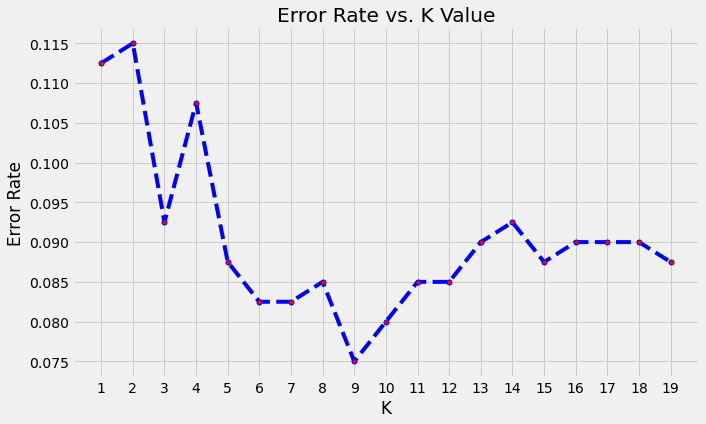

In [76]:
plt.figure(figsize=(10,6))
plt.xticks([x for x in range(21)])
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# Se instancia el modelo
knn = KNeighborsClassifier(n_neighbors=9)
# Se fitea el modelo
knn.fit(X_train, y_train)
# Se predice el modelo
knn_range = knn.predict(X_test)
# Se evalua el modelo
knn_score = knn.score(X_test,y_test)
knn_mae = mean_absolute_error(y_test, rf_range)
print('score KNN: ', knn_score)
print('promedio de error absoluto KNN', knn_mae)

score KNN:  0.925
promedio de error absoluto KNN 0.178475


-----------

# CON SELECCION DE VARIABLES

In [90]:
# Se separ entre variables destino y explicativas
X = data_train[price_range_corr_top.index].drop('price_range', axis = 1)
y = data_train['price_range']

In [93]:
# Se divide el data set para el entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 1)

In [94]:
# Se instancia el modelo
lr = LinearRegression()
# Se fitea el modelo
lr.fit(X_train, y_train)
# Se evalua el modelo
lr_Range = lr.predict(X_test)
lr_Score = lr.score(X_test, y_test)
lr_Mae = mean_absolute_error(y_test, lr_Range)
print('score RL: ', lr_Score)
print('promedio de error absoluto RL', lr_Mae)

score RL:  0.9089734582451858
promedio de error absoluto RL 0.28137926908735283


### Decision Tree Regression

In [95]:
# Se instancia el modelo
dt = DecisionTreeRegressor(max_leaf_nodes=200, random_state = 1)
# Se fitea el modelo
dt.fit(X_train, y_train)
# Prediccion
dt_range = dt.predict(X_test)
# Evaluación del modelo
dt_score = dt.score(X_test, y_test)
dt_Mae = mean_absolute_error(y_test, dt_range)
print('score DT: ', dt_score)
print('promedio de error absoluto DT', dt_Mae)

score DT:  0.878618680585058
promedio de error absoluto DT 0.15


### Decision Tree Classifier


In [96]:
# Se instancia el modelo
dtc = DecisionTreeClassifier(max_leaf_nodes=200,random_state = 1)
# Se fitea el modelo
dtc.fit(X_train, y_train)
# Se predice el modelo
dtc_range = dtc.predict(X_test)
# Se evalua el modelo
dtc_score = dtc.score(X_test, y_test)
dtc_mae = mean_absolute_error(y_test, dtc_range)
print('score DT: ', dtc_score)
print('promedio de error absoluto DT', dtc_mae)

score DT:  0.865
promedio de error absoluto DT 0.135


### Random Forest



In [97]:
# Se instancia el modelo
rf = RandomForestRegressor()
# Se fitea el modelo
rf.fit(X_train, y_train)
# Se predice el modelo
rf_range = rf.predict(X_test)
# Se evalua el modelo
rf_score = rf.score(X_test,y_test)
rf_mae = mean_absolute_error(y_test, rf_range)
print('score RF: ', rf_score)
print('promedio de error absoluto RF', rf_mae)

score RF:  0.9441091622665938
promedio de error absoluto RF 0.15910000000000002


In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
# Se instancia el modelo
knn = KNeighborsClassifier(n_neighbors=4)
# Se fitea el modelo
knn.fit(X_train, y_train)
# Se predice el modelo
knn_range = knn.predict(X_test)
# Se evalua el modelo
knn_score = knn.score(X_test,y_test)
knn_mae = mean_absolute_error(y_test, rf_range)
print('score KNN: ', knn_score)
print('promedio de error absoluto KNN', knn_mae)



score KNN:  0.8925
promedio de error absoluto KNN 0.15910000000000002


In [100]:
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

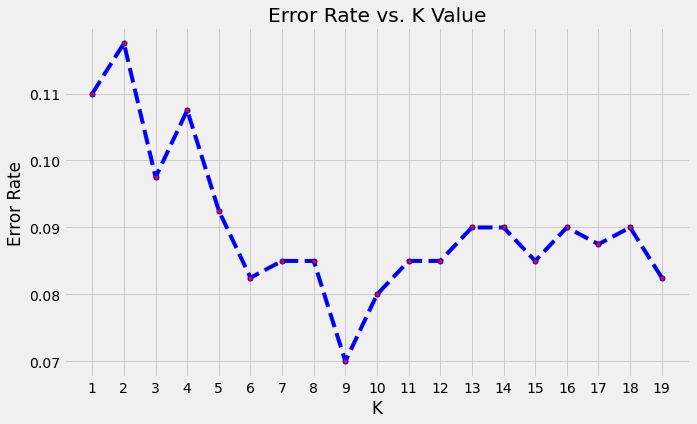

In [101]:
plt.figure(figsize=(10,6))
plt.xticks([x for x in range(21)])
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [102]:
# Se instancia el modelo
knn = KNeighborsClassifier(n_neighbors=9)
# Se fitea el modelo
knn.fit(X_train, y_train)
# Se predice el modelo
knn_range = knn.predict(X_test)
# Se evalua el modelo
knn_score = knn.score(X_test,y_test)
knn_mae = mean_absolute_error(y_test, rf_range)
print('score KNN: ', knn_score)
print('promedio de error absoluto KNN', knn_mae)

score KNN:  0.93
promedio de error absoluto KNN 0.15910000000000002
